In [2]:
import pandas as pd
df= pd.read_csv('final.csv')
df.columns

Index(['CITY', 'DISTRICT', 'ADDRESS', 'TALUK', 'PINCODE', 'GENDER',
       'FAMILY_INCOME', 'CET_RANK', 'KEA_CLAIM_CAT', 'ADMIN MODE', 'AdminYear',
       'SSLCTOTMARKS', 'PUCTOTMARKS', 'PUC_INSTITUTE', 'puc_yr_pass',
       'sslc_yr_pass', 'PCM_total', 'PCM %', 'STATE', 'Religion/ Caste'],
      dtype='object')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CITY             450 non-null    object 
 1   DISTRICT         450 non-null    object 
 2   ADDRESS          450 non-null    object 
 3   TALUK            450 non-null    object 
 4   PINCODE          450 non-null    int64  
 5   GENDER           450 non-null    object 
 6   FAMILY_INCOME    450 non-null    int64  
 7   CET_RANK         362 non-null    float64
 8   KEA_CLAIM_CAT    450 non-null    object 
 9   ADMIN MODE       445 non-null    object 
 10  AdminYear        450 non-null    int64  
 11  SSLCTOTMARKS     450 non-null    float64
 12  PUCTOTMARKS      450 non-null    float64
 13  PUC_INSTITUTE    450 non-null    object 
 14  puc_yr_pass      437 non-null    float64
 15  sslc_yr_pass     450 non-null    int64  
 16  PCM_total        450 non-null    int64  
 17  PCM %           

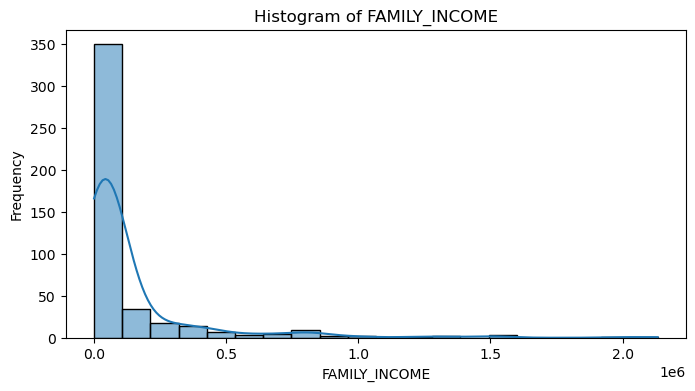

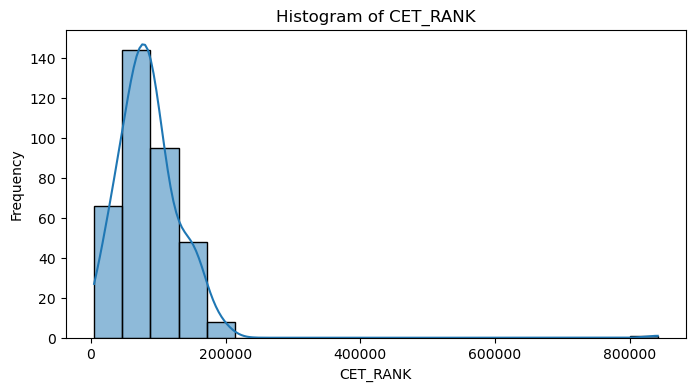

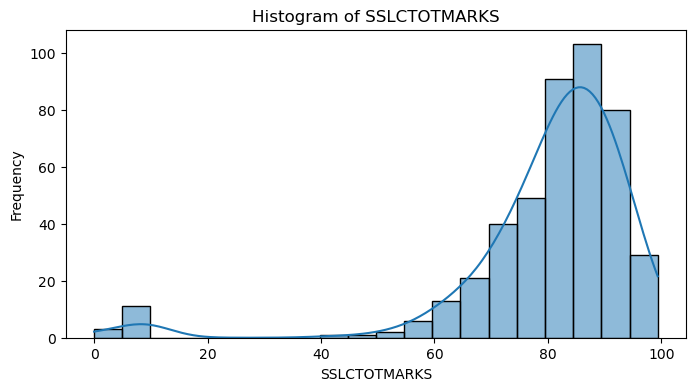

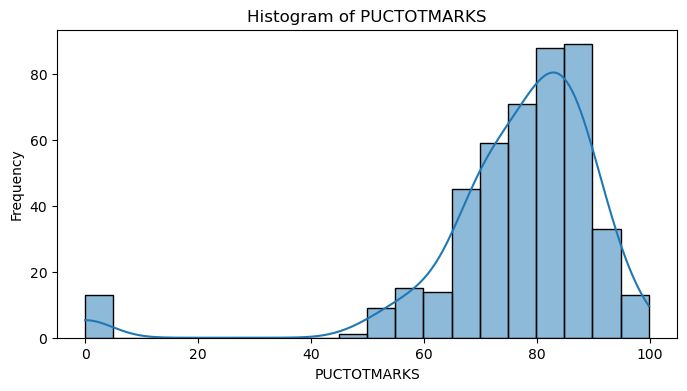

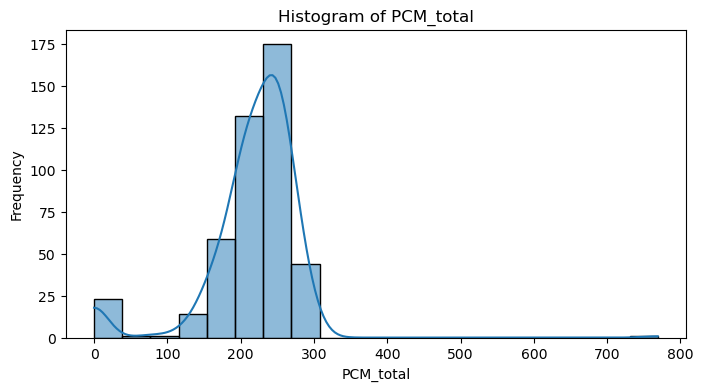

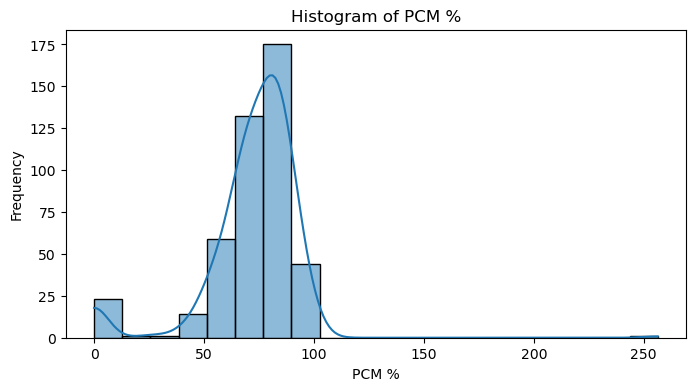

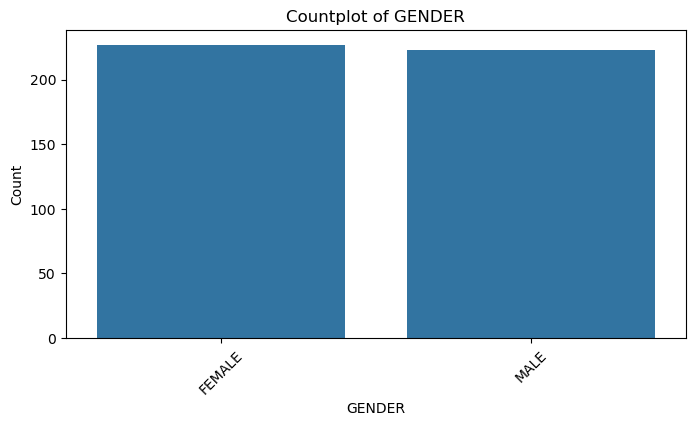

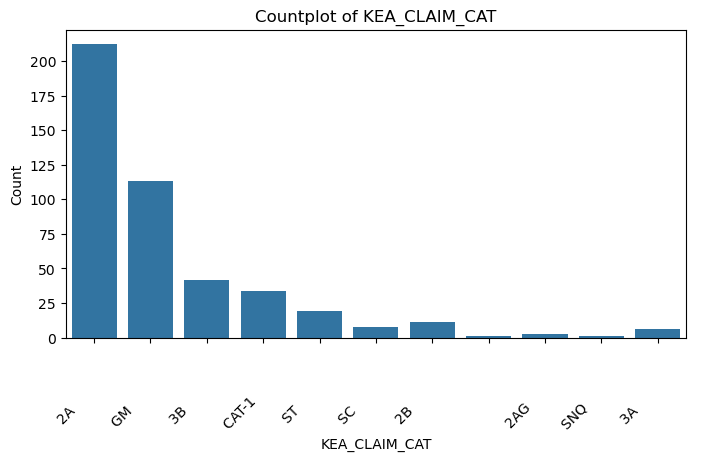

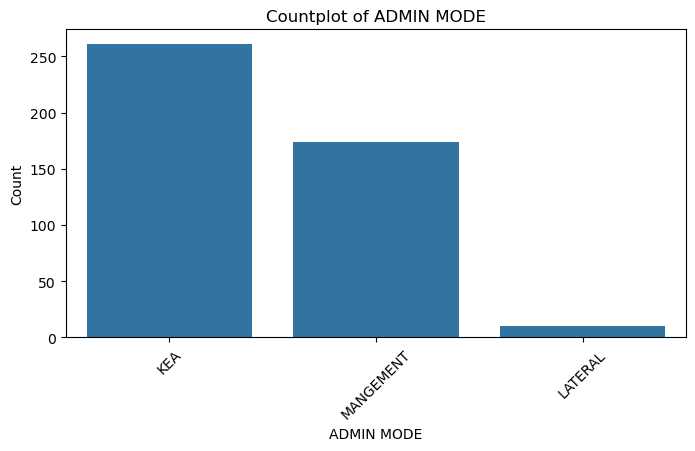

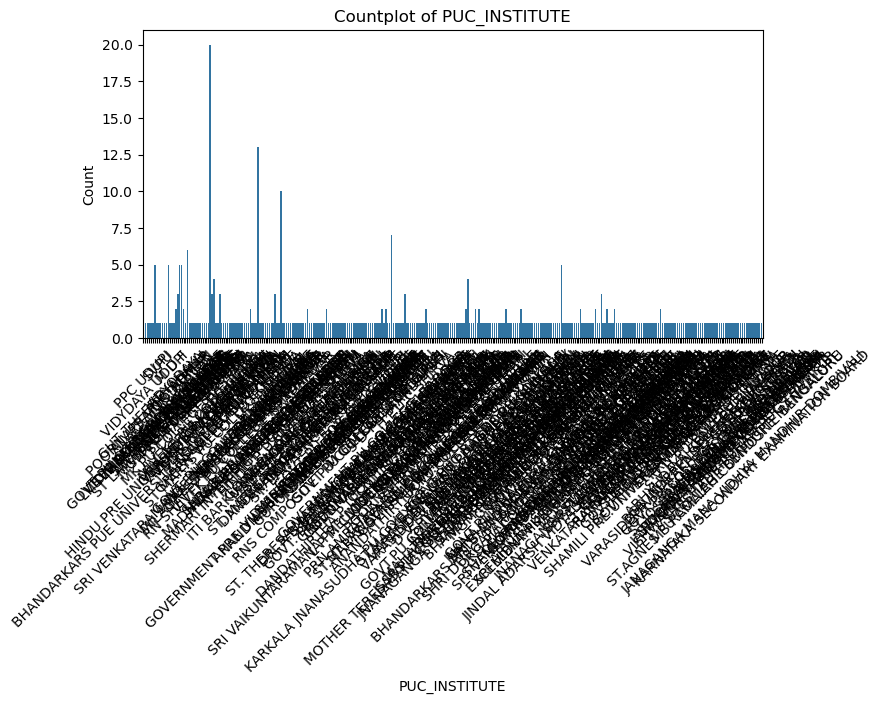

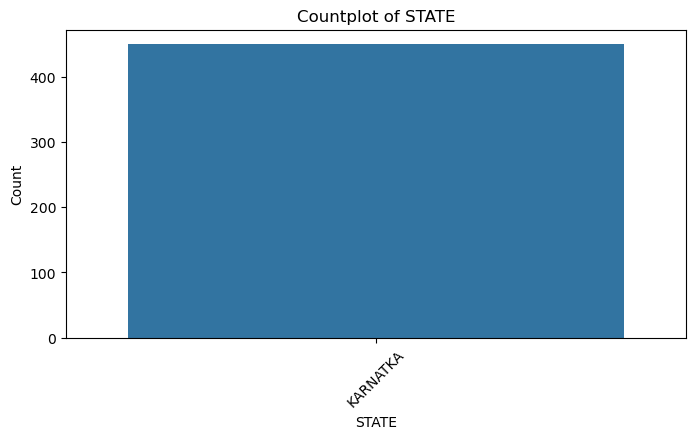

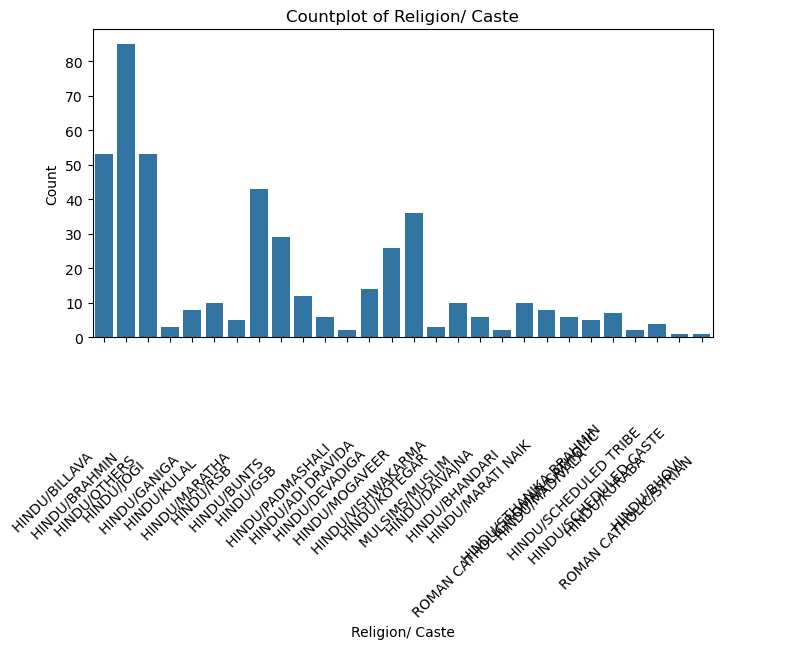

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical variables
numerical_cols = ['FAMILY_INCOME', 'CET_RANK', 'SSLCTOTMARKS', 'PUCTOTMARKS', 'PCM_total', 'PCM %']
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Bar plots for categorical variables
categorical_cols = ['GENDER', 'KEA_CLAIM_CAT', 'ADMIN MODE', 'PUC_INSTITUTE', 'STATE', 'Religion/ Caste']
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col)
    plt.title(f'Countplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


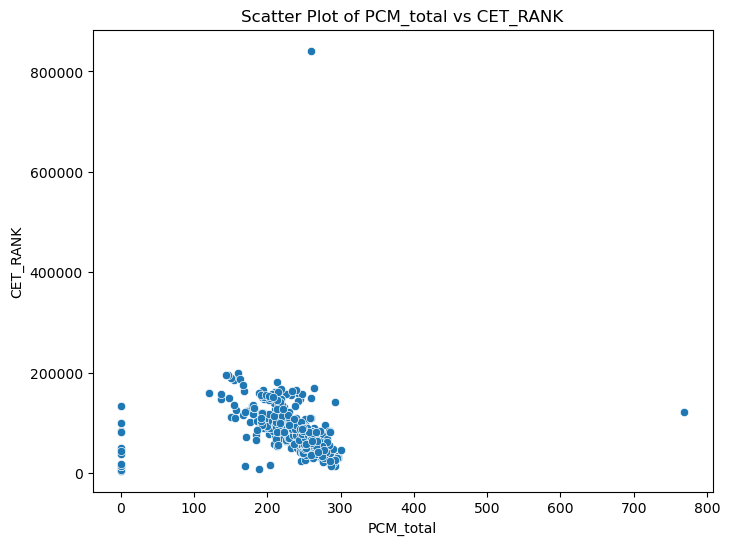

In [5]:
# Scatter plots for numerical vs numerical variables
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCM_total', y='CET_RANK', data=df)
plt.title('Scatter Plot of PCM_total vs CET_RANK')
plt.xlabel('PCM_total')
plt.ylabel('CET_RANK')
plt.show()


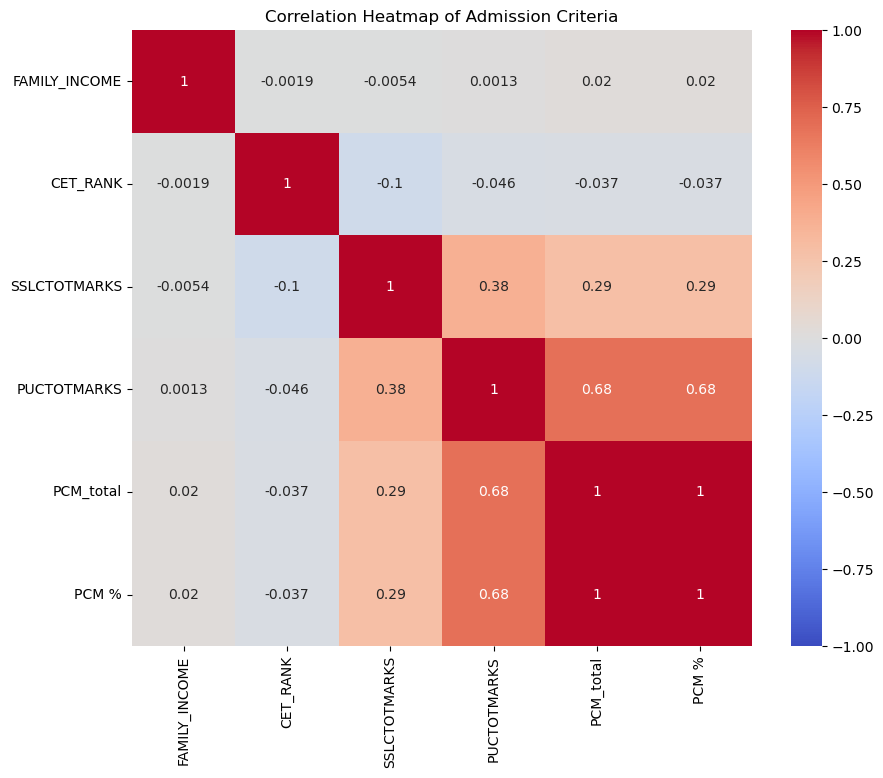

In [6]:
# Correlation matrix
correlation_matrix = df[['FAMILY_INCOME', 'CET_RANK', 'SSLCTOTMARKS', 'PUCTOTMARKS', 'PCM_total', 'PCM %']].corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Admission Criteria')
plt.show()


/tmp/ipykernel_62248/116963931.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='FAMILY_INCOME_BINNED', palette='viridis')


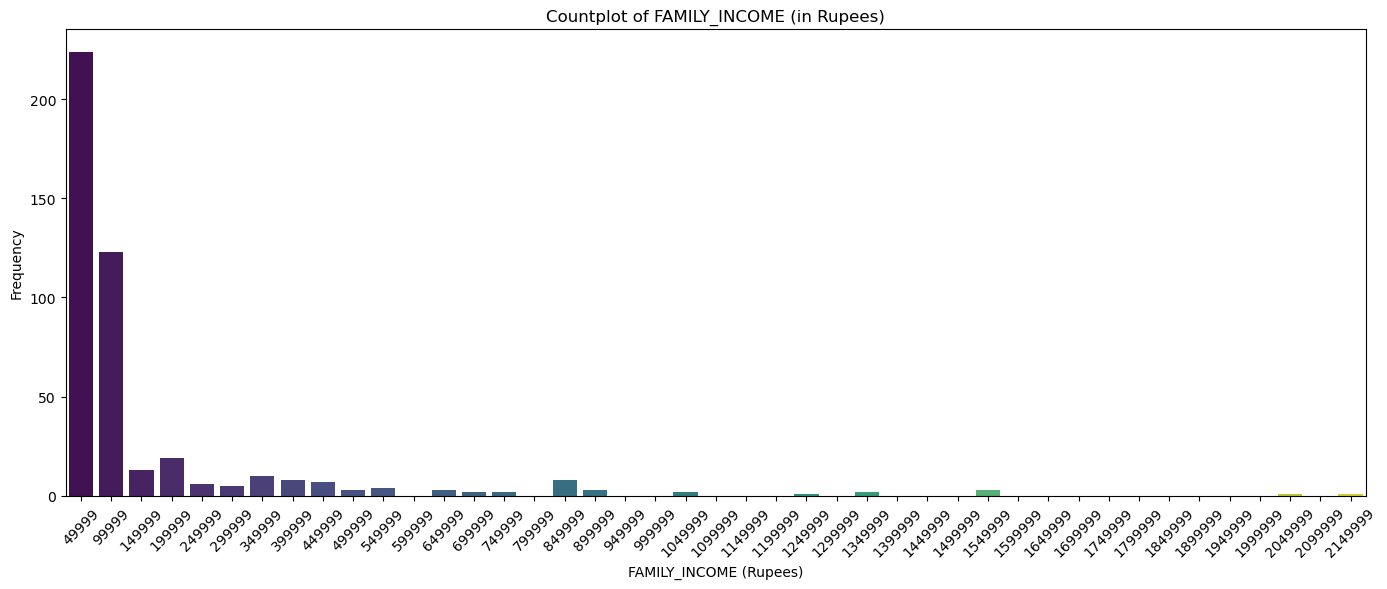

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example DataFrame (replace with your actual DataFrame)
# df = pd.read_csv('your_dataset.csv')

# Define the bins for FAMILY_INCOME
bins = list(range(0,df[df['FAMILY_INCOME']<3000000]['FAMILY_INCOME'].max() + 50000, 50000))
labels = [f'{b+49999}' for b in bins[:-1]]

# Bin the FAMILY_INCOME data
df['FAMILY_INCOME_BINNED'] = pd.cut(df['FAMILY_INCOME'], bins=bins, labels=labels, right=False)

# Create the countplot using the binned data
plt.figure(figsize=(14, 6))  # Adjust figure size as needed
sns.countplot(data=df, x='FAMILY_INCOME_BINNED', palette='viridis')
plt.title('Countplot of FAMILY_INCOME (in Rupees)')
plt.xlabel('FAMILY_INCOME (Rupees)')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [23]:
df_filtered = df[df['CET_RANK'] < 300000]
df_filtered

,CITY,DISTRICT,ADDRESS,TALUK,PINCODE,GENDER,FAMILY_INCOME,CET_RANK,KEA_CLAIM_CAT,ADMIN MODE,...,SSLCTOTMARKS,PUCTOTMARKS,PUC_INSTITUTE,puc_yr_pass,sslc_yr_pass,PCM_total,PCM %,STATE,Religion/ Caste,FAMILY_INCOME_BINNED
0,UDUPI,UDUPI,KASHI GARDEN KURKALU VILLAGE POST SUBHASNAGAR ...,UDUPI,574105,FEMALE,11000,39097.0,2A,KEA,...,91.52,88.33,PPC UDUPI,2019.0,2017,257,85.666666,KARNATKA,HINDU/BILLAVA,49999
1,UDUPI,UDUPI,5 - 107 K2 NISARGA VASUKI NAGARA 76 BB BAILOOR...,UDUPI,576101,FEMALE,190000,97300.0,GM,KEA,...,8.60,71.00,VIDYDAYA UDUPI,2019.0,2017,192,64.000000,KARNATKA,HINDU/BRAHMIN,199999
2,UDUPI,UDUPI,SHRI GAJAGOWRI MAHALINGESHWARA TEMPLE VILLAGE ...,BRAHMAVAR,576213,MALE,60000,79557.0,GM,KEA,...,74.08,63.66,"GOVT PU COLLGE, BRAHMAVAR",2019.0,2017,218,72.666666,KARNATKA,HINDU/BRAHMIN,99999
3,UDUPI,UDUPI,JNANASUDHA ULIYARU POST MAJOOR KAPU-574106,UDUPI,574106,FEMALE,50000,22521.0,GM,MANGEMENT,...,9.80,93.30,"POORNAPRAJNA, ADMAR",2019.0,2017,276,92.000000,KARNATKA,HINDU/BRAHMIN,99999
5,UDUPI,UDUPI,"KAMMARDI POST,KESALLUR ARCHALLI GRAMA SHIMOGA...",THIRTHAHALLI,577432,MALE,20000,89677.0,CAT-1,KEA,...,91.20,67.00,GUT THEERTHAHALLI,2019.0,2017,199,66.333333,KARNATKA,HINDU/JOGI,49999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,BRAHMAVARA,UDUPI,"D/O,SHIVARAM POOJARY #1-50 ""VIJAYALAXMI"" SALIK...",BRAHMAVAR,576213,FEMALE,40000,151159.0,2A,MANGEMENT,...,83.84,75.00,SMS PUC BRAHMAVAR,2023.0,2021,208,69.333333,KARNATKA,HINDU/BILLAVA,49999
445,KARKALA,UDUPI,"S/O,VIKRAM R K 3/31-1 MITTABETTU HOUSE TELLAR ...",KARKALA,576117,MALE,70000,95576.0,2A,MANGEMENT,...,89.40,76.66,SB PUC KARKALA,2023.0,2021,230,76.666666,KARNATKA,HINDU/BILLAVA,99999
447,UDUPI,UDUPI,"D/O,UMESH ACHARYA ""SHREE DURGA NIVAS"" 92 HEROO...",UDUPI,574115,FEMALE,36000,83274.0,2A,KEA,...,69.92,84.50,SVH PU COLLEGE INNANJE,2023.0,2021,272,90.666666,KARNATKA,HINDU/VISHWAKARMA,49999
448,HASSAN,HASSAN,"S/O,DEVEGOWDA B SHANTHIGRAMA (4),B HOSAHALLI V...",HASSAN,573220,MALE,45000,108798.0,3A,KEA,...,96.80,78.30,MDR PU COLLEGE DUDDA,2023.0,2021,258,86.000000,KARNATKA,HINDU/OTHERS,49999


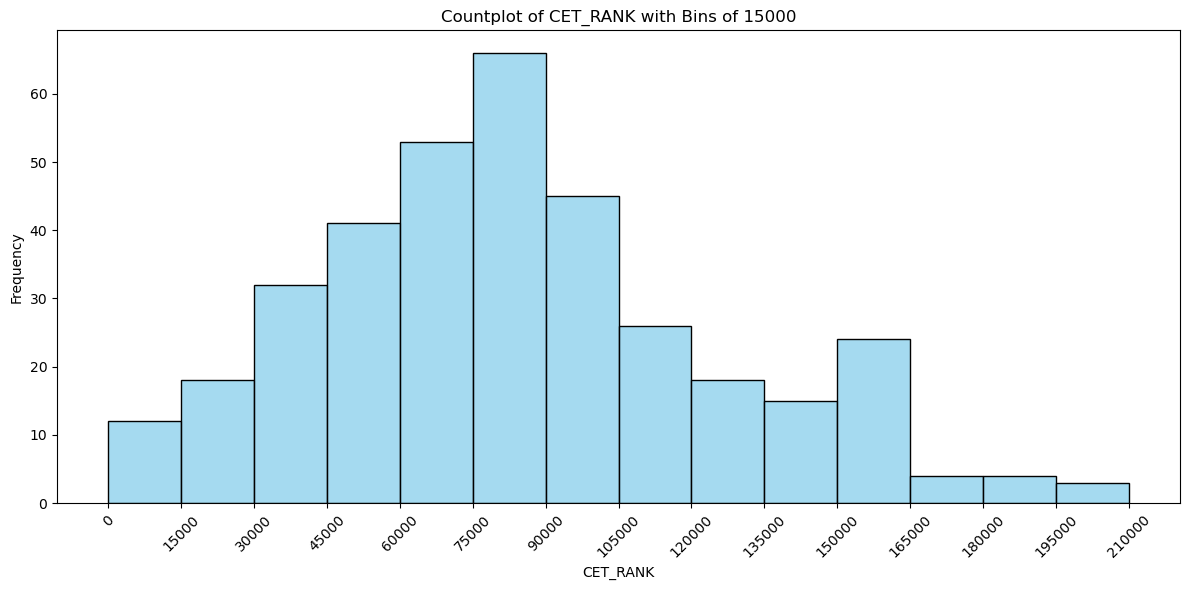

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Adjust figure size and style
plt.figure(figsize=(12, 6))  # Adjust figure size as needed

# Calculate bin edges for CET_RANK with a step of 15000
bin_edges = list(range(0, int(df_filtered['CET_RANK'].max()) + 15000, 15000))

# Create the countplot
sns.histplot(df_filtered['CET_RANK'], bins=bin_edges, kde=False, color='skyblue')

# Customize labels and title
plt.title('Countplot of CET_RANK with Bins of 15000')
plt.xlabel('CET_RANK')
plt.ylabel('Frequency')

# Set x-axis ticks at bin edges
plt.xticks(bin_edges, rotation=45)

plt.tight_layout()
plt.show()
